In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/arjuntejaswi/plant-village")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kinjalkanjilal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village


In [3]:
!pip install tensorflow
!pip install IPython.display import HTML

ERROR: Could not find a version that satisfies the requirement IPython.display (from versions: none)
ERROR: No matching distribution found for IPython.display


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/plant-village/PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[14  9 14  6  3  0  7  6  3 11  9  8  5  3  3  5  5  9 10  6 14 14  2  2
 14  6  5  2  9 12  2  8]


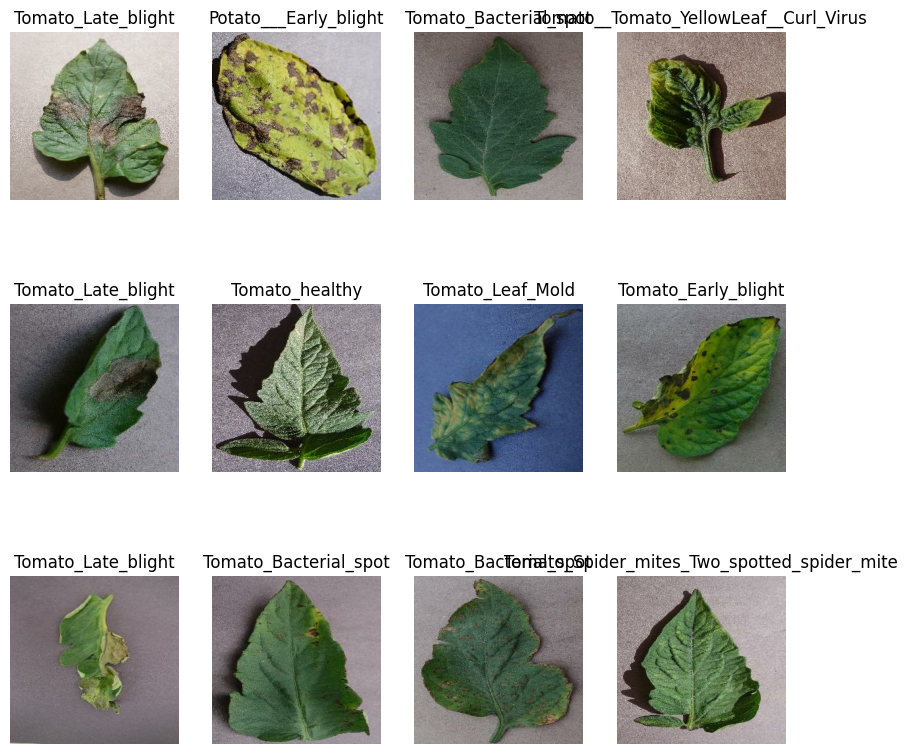

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
len(dataset)

645

In [ ]:
train_size = 0.8
len(dataset)*train_size

516.0

In [ ]:
train_ds = dataset.take(516)
len(train_ds)

516

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import plot_model

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(256,256,3)
    )

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(15,activation='softmax'))

In [7]:
conv_base.trainable=False

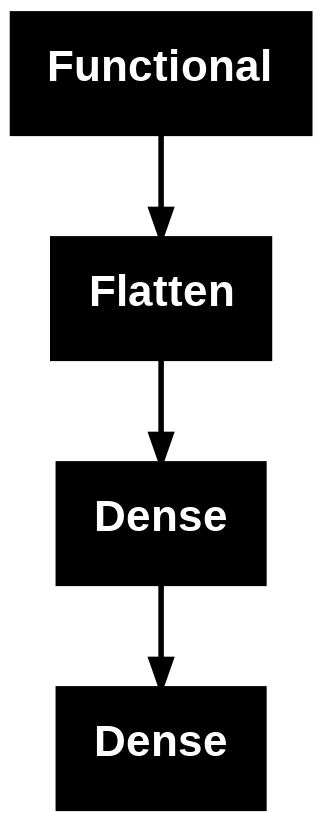

In [8]:
plot_model(model)

In [ ]:
!pip install plot_model

Defaulting to user installation because normal site-packages is not writeable


In [9]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,107,407 (88.15 MB)

 Trainable params: 8,392,719 (32.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [12]:
batch_size = 64

# Define data augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # Use 20% of the data for validation
)

# Path to the dataset directory containing 'nonfresh' and 'fresh' folders
dataset_path = '/content/plant-village/PlantVillage'  # Update with your folder path

# Training generator (80% of data)
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Indicates this is the training split
)

# Validation generator (20% of data)
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Indicates this is the validation split
)

Found 18580 images belonging to 15 classes.
Found 2058 images belonging to 15 classes.


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 393s 1s/step - accuracy: 0.6111 - loss: 1.9031 - val_accuracy: 0.8474 - val_loss: 0.4490
Epoch 2/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.8644 - loss: 0.4011 - val_accuracy: 0.8771 - val_loss: 0.3513
Epoch 3/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.8960 - loss: 0.2998 - val_accuracy: 0.8946 - val_loss: 0.3397
Epoch 4/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.9196 - loss: 0.2382 - val_accuracy: 0.8615 - val_loss: 0.4533
Epoch 5/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - accuracy: 0.9328 - loss: 0.1966 - val_accuracy: 0.9043 - val_loss: 0.2959
Epoch 6/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - accuracy: 0.9401 - loss: 0.1803 - val_accuracy: 0.9072 - val_loss: 0.2503
Epoch 7/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 348s 1s/step - accuracy: 0.9511 - loss: 0.1472 - val_accuracy: 0.9082 - val_loss: 0.2819
Epoch 8/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 349s 1s/step - accuracy: 0.9498 - loss: 0.1480 - val_accu

In [17]:
model.save('plant.h5')

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
model.save('plant_model.keras')

In [26]:
import pickle
with open('plant_pickle.pkl', 'wb') as f:
    pickle.dump('plant_model.keras', f)

In [27]:
scores = model.evaluate(validation_generator)

33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9045 - loss: 0.3201


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [33]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/plant-village/PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(256,256),
    batch_size=64
)

Found 20638 files belonging to 15 classes.


In [34]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

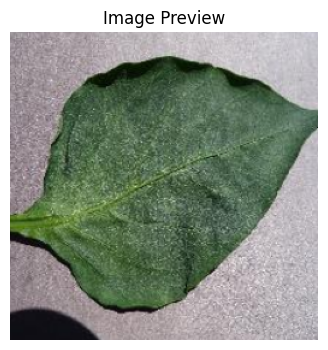

Actual label: Pepper__bell___healthy
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step
Predicted label: Pepper__bell___healthy


In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch from the generator
images_batch, labels_batch = next(validation_generator)

# Get the 4th image and its label
first_image = images_batch[3]
first_label = labels_batch[3]

# If the image was normalized (e.g., in range [0, 1]), rescale to [0, 255] for display
if first_image.max() <= 1.0:
    display_image = (first_image * 255).astype('uint8')
else:
    display_image = first_image.astype('uint8')

# Plot the image
plt.figure(figsize=(4, 4))
plt.imshow(display_image)
plt.axis('off')
plt.title("Image Preview")
plt.show()

# Print the actual label
print("Actual label:", class_names[np.argmax(first_label)])

# Predict the class for the batch
batch_prediction = model.predict(images_batch)

# Show prediction for the 4th image
print("Predicted label:", class_names[np.argmax(batch_prediction[3])])


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step


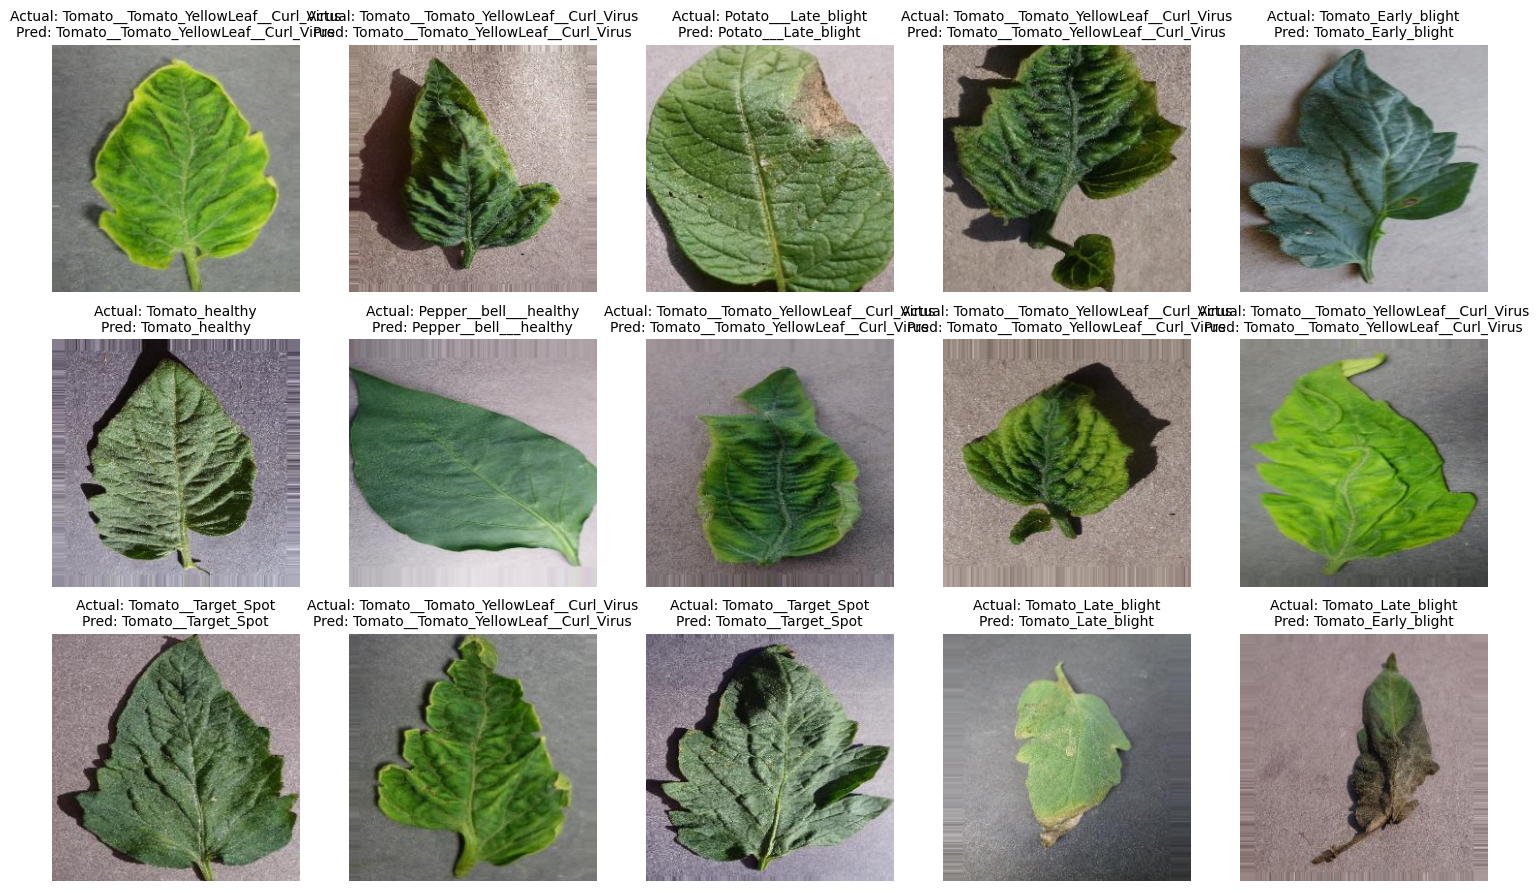

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Get a batch from the generator (make sure batch size >= 15)
images_batch, labels_batch = next(validation_generator)

# Get 15 random indices from the batch
num_images = 15
indices = random.sample(range(len(images_batch)), num_images)

# Predict on the batch
batch_prediction = model.predict(images_batch)

# Create subplots
plt.figure(figsize=(15, 9))  # Adjust size for readability

for i, idx in enumerate(indices):
    image = images_batch[idx]
    label = labels_batch[idx]
    prediction = batch_prediction[idx]

    # Rescale image for display if needed
    if image.max() <= 1.0:
        display_image = (image * 255).astype('uint8')
    else:
        display_image = image.astype('uint8')

    # Plot each image in a subplot
    plt.subplot(3, 5, i + 1)
    plt.imshow(display_image)
    plt.axis('off')
    actual_label = class_names[np.argmax(label)]
    predicted_label = class_names[np.argmax(prediction)]
    plt.title(f"Actual: {actual_label}\nPred: {predicted_label}", fontsize=10)

plt.tight_layout()
plt.show()
